In [1]:
import numpy as np

import math

from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile

from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from shor_algo_adder_method import qft, qft_dagger,set_start_state, adder, subtracter
from qiskit.circuit.library import DraperQFTAdder, QFT



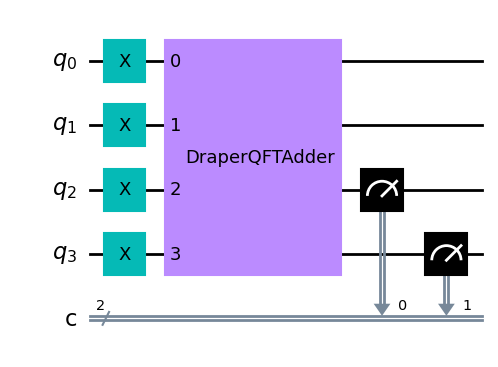

In [5]:
n = 4
q = QuantumRegister(n, 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

thiers = QuantumCircuit(q, c)
main = QuantumCircuit(q, c)

a = 3
b = 3

set_start_state(thiers, a, 0)
set_start_state(thiers, b, n//2)

set_start_state(main, a, 0)
set_start_state(main, b, n//2)


main.append(qft(math.ceil(n/2), False), range(n//2, n))
# main = main.compose(adder(n//2, kind="half"), qubits=range(n))
main.append(adder(n//2, kind="fixed"), range(n))
main.append(qft_dagger(math.ceil(n/2), False), range(n//2, n))

# thiers = thiers.compose(DraperQFTAdder(n//2, kind="half").decompose(), range(n))
thiers.append(DraperQFTAdder(n//2, kind="fixed"), range(n))

thiers.measure(range(n//2, n), range(math.ceil(n/2)))
main.measure(range(n//2, n), range(math.ceil(n/2)))

thiers.draw("mpl")

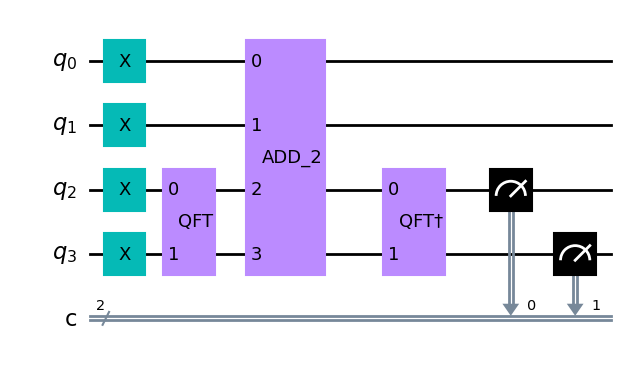

In [6]:
main.draw('mpl')

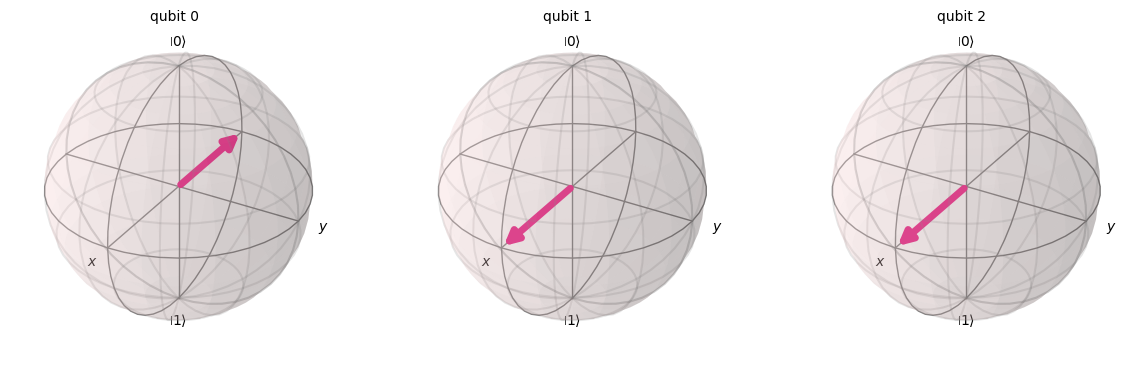

In [31]:
sim = Aer.get_backend("aer_simulator")
qc_init = ft.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

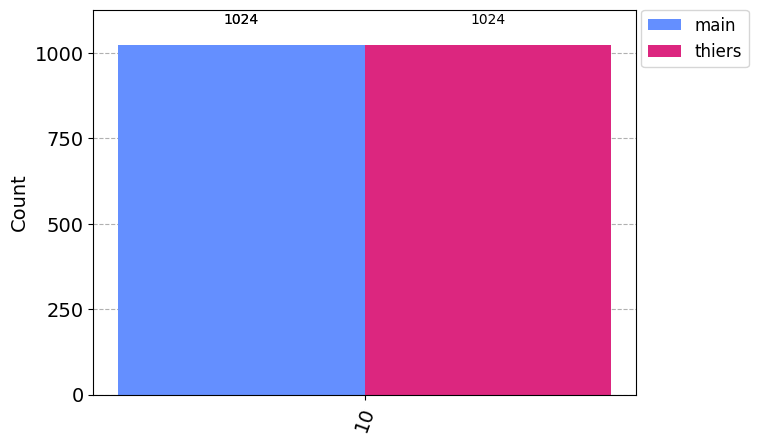

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_thiers = transpile(thiers, aer_sim)
t_main = transpile(main, aer_sim)


counts_thiers = aer_sim.run(t_thiers).result().get_counts()
count_main = aer_sim.run(t_main).result().get_counts()
plot_histogram([count_main, counts_thiers], legend=["main", "thiers"])

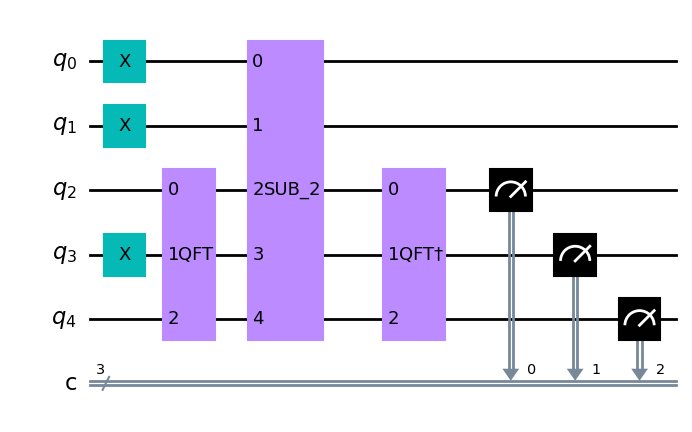

In [2]:
n = 5
q = QuantumRegister(n, 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

subtract = QuantumCircuit(q, c)

a = 3
b = 2

set_start_state(subtract, a, 0)
set_start_state(subtract, b, n//2)


subtract.append(qft(math.ceil(n/2), False), range(n//2, n))
# main = main.compose(adder(n//2, kind="half"), qubits=range(n))
# subtract = subtract.compose(adder(n//2, kind="half").inverse(), range(n))
subtract.append(subtracter(n//2), range(n))
subtract.append(qft_dagger(math.ceil(n/2), False), range(n//2, n))

# thiers = thiers.compose(DraperQFTAdder(n//2, kind="half").decompose(), range(n))

subtract.measure(range(n//2, n), range(math.ceil(n/2)))

subtract.draw("mpl")

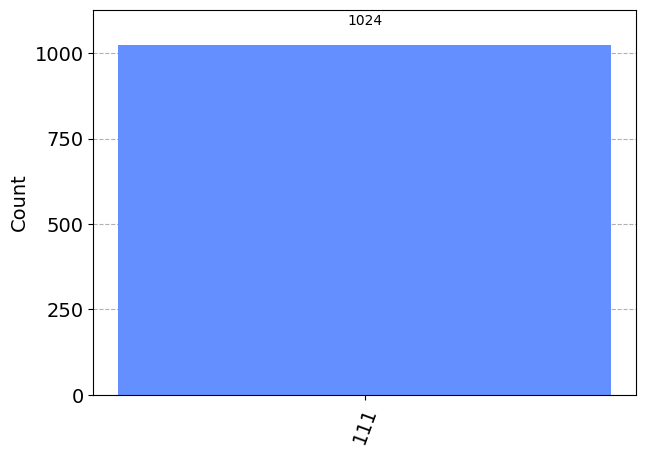

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
t_subtract = transpile(subtract, aer_sim)


counts_subtract = aer_sim.run(t_subtract).result().get_counts()
plot_histogram(counts_subtract)

In [53]:
qc = adder(3, 4)
qc.draw()

2        1     
q57_0: ────────■────────■─────
        1      │        │     
q57_1: ─■──────┼────────┼─────
        │      │        │     
a13_0: ─┼──────┼────────┼─────
        │      │        │P(π) 
a13_1: ─┼──────┼────────■─────
        │P(π)  │P(π/2)        
a13_2: ─■──────■──────────────

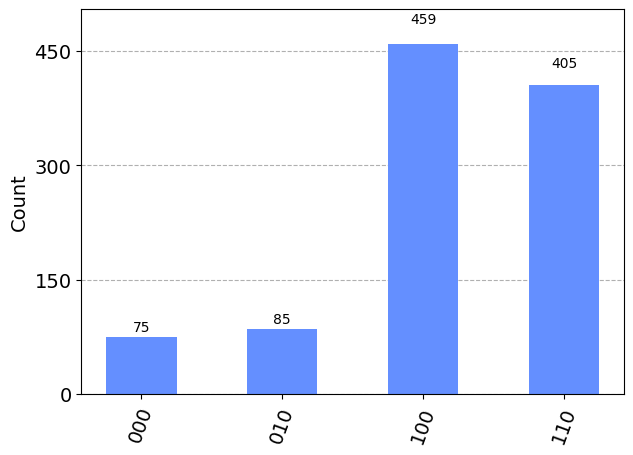

In [43]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)